In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## Pengertian Bisnis

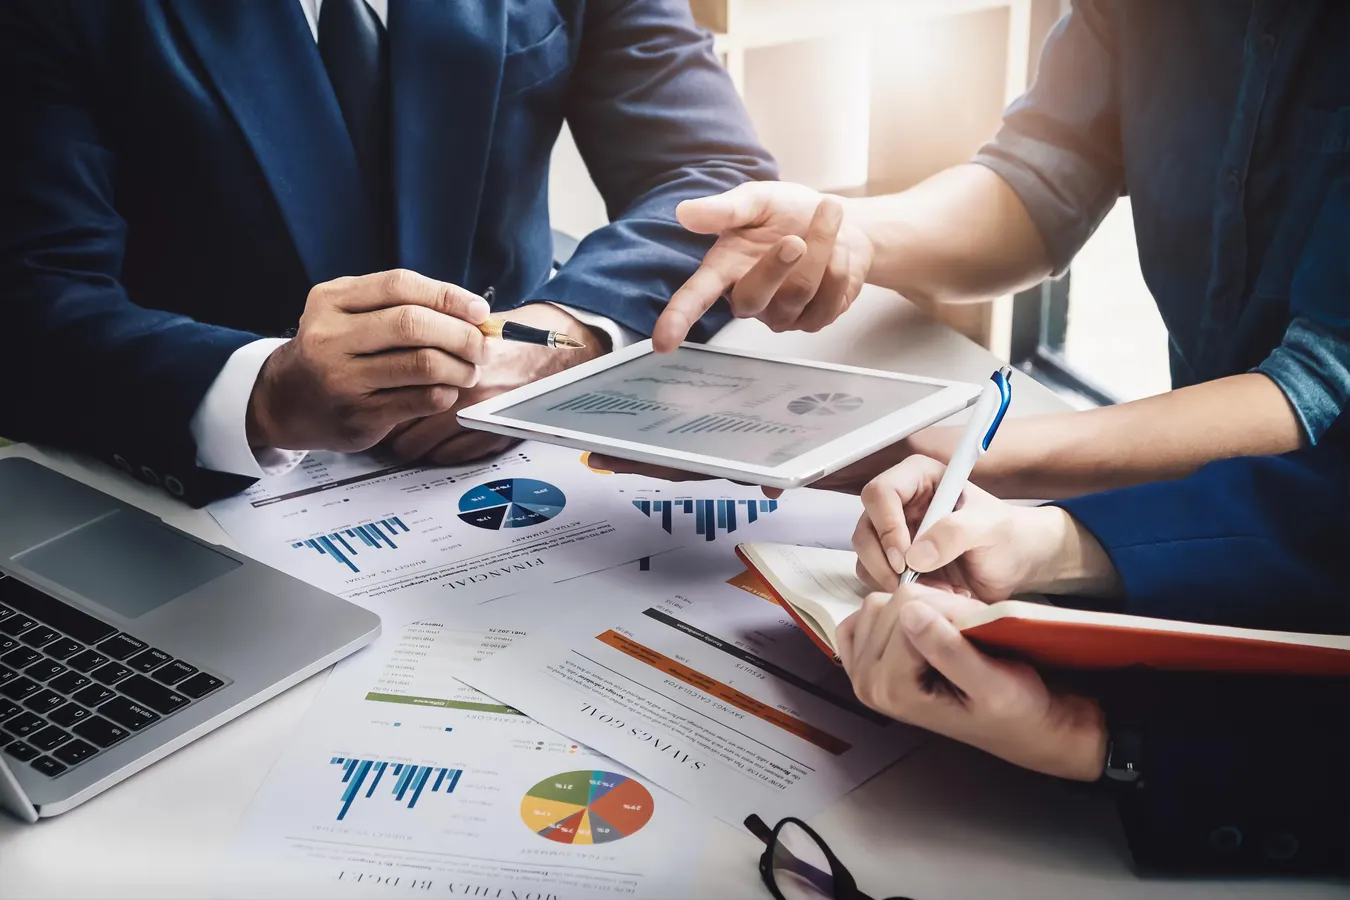

**Pengenalan**

*The Look* adalah platform *e-commerce* yang menawarkan produk *fashion* terlengkap dan harga yang kompetitif. Dengan klien berbasis internasional, *The Look* menyediakan fitur *international shipping* & *delivery* beserta *order cancellation*

**Stakeholder Statement**

Tim manajemen *The Look* menyadari kunci keberhasilan perusahaan adalah hubungan erat antara platform *The Look* dengan konsumen saat ini. Untuk meningkatkan hubungan tersebut, maka tim manajemen perlu melaksanakan analisa *cohort* konsumen untuk mengetahui retensi konsumen saat ini.

## Rumusan Masalah

Bagaimana manajemen *The Look* mampu mengidentifikasi tren dalam retensi *cohort* sepanjang periode 2019 hingga 2024 untuk meningkatkan *repeat purchase* dan menunjang *long-term revenue* di platform *The Look*?

Untuk menjawab rumusan masalah tersebut, maka akan dilakukan analisa data mengunnakan bahasa pemograman `Python` beserta *packages* seperti `Pandas` dan `Seaborn` untuk menampilkan poin-poin analisa berikut:
- Mitigasi data *invalid*
- Variabel *cohort retention* yang digunakan
- Periode *retention*

## Load Data

Pertama, kita akan mengunduh data ke dalam `Pandas DataFrame` agar data dapat dianalisa di dalam `Jupyter Notebook`.

In [3]:
# load the dataset into pandas
df = pd.read_csv('order_items.csv',
                        parse_dates=['created_at','shipped_at','delivered_at','returned_at']
                       )
df

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02
...,...,...,...,...,...,...,...,...,...,...,...
181754,9674,6679,5325,24447,26095,Returned,2020-12-23 00:05:01+00:00,2020-12-25 22:54:00+00:00,2020-12-28 07:08:00+00:00,2020-12-30 22:43:00+00:00,999.00
181755,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaN,NaN,999.00
181756,62986,43364,34691,23546,169937,Shipped,2023-02-26 00:38:43+00:00,2023-02-25 06:53:00+00:00,NaN,NaN,999.00
181757,106577,73418,58623,24447,287560,Shipped,2023-11-12 02:41:02+00:00,2023-11-14 20:44:00+00:00,NaN,NaN,999.00


## EDA & Data Cleansing

Selanjutnya, data yang telah dimasukkan ke `Pandas DataFrame` akan kita masukkan lakukan *Exploratory Data Analysis* dan *Data Cleansing* agar data menjadi lebih matang untuk analisa retensi *cohort*.

Proses pertama dari proses *data cleansing* adalah untuk mengganti beberapa kolom (seperti `status`, `id`, dsb.) menjadi data kategorikal beserta urutan manualnya untuk kolom `status` (`Cancelled`, `Processing`, `Shipped`, `Returned`, `Complete`).

In [6]:
# manually sorting the categorical column for status
df['status'] = pd.Categorical(df['status'], ['Cancelled', 'Processing', 'Shipped', 'Returned', 'Complete'])

# changing several columns into categorical data
for col in ['id', 'order_id', 'user_id', 'product_id', 'inventory_item_id']:
    df[col] = df[col].astype('category')

Selanjutnya, kolom-kolom yang mengandung data bersifat tanggal (`datetime`) akan dibersihkan menggunakan `regex` dan dikonversikan menjadi `datetime` melalui metode `pd.to_datetime`.

In [8]:
#Hapus '+00:00' dari semua kolom di dataframe secara langsung
df[['created_at', 'shipped_at', 'delivered_at', 'returned_at']] = (
    df[['created_at', 'shipped_at', 'delivered_at', 'returned_at']]
    .apply(lambda x: x.str.replace(r'\+00:00', '', regex=True)) # apply regex to throw out +00:00
    .apply(lambda x : pd.to_datetime(x, format='mixed'))  # Konversi ulang ke datetime
)

Data divalidasi jenis tipenya menggunakan metode `.info()`

In [10]:
# check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181759 entries, 0 to 181758
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 181759 non-null  category      
 1   order_id           181759 non-null  category      
 2   user_id            181759 non-null  category      
 3   product_id         181759 non-null  category      
 4   inventory_item_id  181759 non-null  category      
 5   status             181759 non-null  category      
 6   created_at         181759 non-null  datetime64[ns]
 7   shipped_at         118281 non-null  datetime64[ns]
 8   delivered_at       63841 non-null   datetime64[ns]
 9   returned_at        18232 non-null   datetime64[ns]
 10  sale_price         181759 non-null  float64       
dtypes: category(6), datetime64[ns](4), float64(1)
memory usage: 29.9 MB


Kemudian, dilakukan analisa statistik data numerik/tanggal menggunakan metode `.describe()`.

In [12]:
# display descriptive statistics of the dataframe
df.describe()

,created_at,shipped_at,delivered_at,returned_at,sale_price
count,181759,118281,63841,18232,181759.000000
mean,2022-10-24 17:46:02.968706816,2022-10-25 03:35:10.066188544,2022-10-27 23:47:53.183116032,2022-10-30 23:01:59.265073920,59.568544
min,2019-01-06 02:25:41,2019-01-09 04:36:00,2019-01-18 04:47:00,2019-01-21 03:46:00,0.020000
25%,2022-02-24 10:16:22,2022-02-25 15:28:00,2022-02-28 12:39:00,2022-02-28 08:49:15,24.500000
50%,2023-02-21 01:19:27,2023-02-21 03:39:00,2023-02-24 23:08:00,2023-03-03 05:18:00,39.990002
75%,2023-09-27 03:51:44.500000,2023-09-27 19:19:00,2023-09-30 04:30:00,2023-10-03 20:22:15,69.949997
max,2024-01-21 18:02:23.533893,2024-01-20 17:57:00,2024-01-24 22:14:42.220676,2024-01-27 05:16:19.046968,999.000000
std,NaN,NaN,NaN,NaN,66.657262


Berdasarkan tabel statistik di atas, dapat disimpulkan bahwa tanggal order pada *dataset* dimulai pada tanggal 6 Januari 2019 hingga tanggal 21 Januari 2024 berdasarkan kolom `created_at`.

Selanjutnya, akan dilakukan penghitungan jumlah order berdasarkan kolom `status` beserta visualisasinya yang sesuai.

status
Shipped       54440
Complete      45609
Processing    36388
Cancelled     27090
Returned      18232
Name: count, dtype: int64

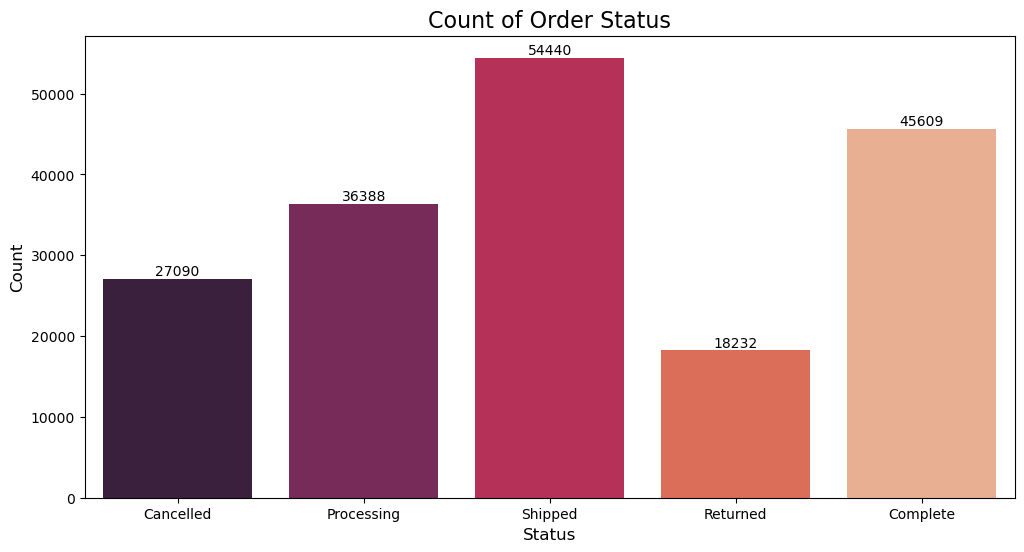

In [14]:
# shows status of order
display(df['status'].value_counts())

# Set up the plot
plt.figure(figsize=(12, 6))

# draw the plot
ax = sns.countplot(df, x='status', palette = 'rocket')
# Add text annotations to show the counts
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate non-zero bars
        ax.text(
            p.get_x() + p.get_width() / 2,  # x-coordinate
            p.get_height() + 900,  # y-coordinate (slightly above the bar)
            int(p.get_height()),  # Text value (cast as int to remove decimals)
            ha="center",  # Horizontal alignment
            va="center",  # Vertical alignment
            fontsize=10,  # Font size
            color="black",  # Text color
        )
# Customize the plot
plt.title('Count of Order Status', fontsize = 16)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

Berdasarkan kategorisasi data, dapat disimpulkan bahwa order di *dataset* memiliki 5 pengelompokan `status`. Untuk memvalidasi jumlah pengelompokan order pada *dataset*, maka dilakukan pengelompokan data berdasarkan tahapan (`stages`) order seperti `created_at` dan `delivered_at` beserta visualisasinya.

> Tambahkan blockquote



,created_at,shipped_at,delivered_at,returned_at
status,,,,
Cancelled,27090,0,0,0
Processing,36388,0,0,0
Shipped,54440,54440,0,0
Returned,18232,18232,18232,18232
Complete,45609,45609,45609,0


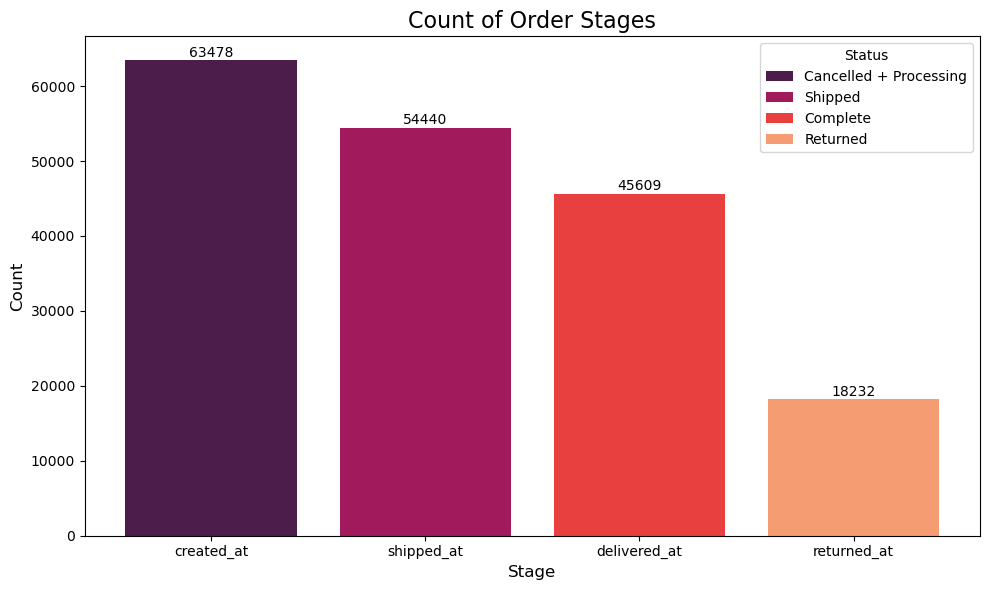

In [16]:
# checking order timestamp based on order status
display(df.groupby('status')[['created_at', 'shipped_at', 'delivered_at', 'returned_at']].count())

# creating a long dataframe to  setup the plot
df_long = pd.melt(df.groupby('status')[['created_at', 'shipped_at', 'delivered_at', 'returned_at']].count().reset_index(), id_vars="status", var_name="stage", value_name="count")

# Define the rules for filtering
rules = {
    "Cancelled": ["created_at"],
    "Processing": ["created_at"],
    "Shipped": ["shipped_at"],
    "Returned": ["returned_at"],
    "Complete": ["delivered_at"]
}

# Apply the filtering logic
df_long = df_long[df_long.apply(lambda row: row["stage"] in rules.get(row["status"], []), axis=1)]

# Preprocess the data to stack 'Cancelled' and 'Processing'
stacked_data = df_long[df_long["status"].isin(["Cancelled", "Processing"])]
stacked_sum = stacked_data.groupby("stage", as_index=False).agg({"count": "sum"})
stacked_sum["status"] = "Cancelled + Processing"

# Keep the other statuses separate
other_data = df_long[~df_long["status"].isin(["Cancelled", "Processing"])]

# Combine the data
final_data = pd.concat([stacked_sum, other_data])

# Define color palette using 'rocket'
palette = sns.color_palette("rocket", n_colors=len(final_data["status"].unique()))
status_colors = dict(zip(final_data["status"].unique(), palette))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = {}

# Iterate through stages to stack the data
for stage in final_data["stage"].unique():
    stage_data = final_data[final_data["stage"] == stage]
    bottom = 0
    for _, row in stage_data.iterrows():
        bars[row["status"]] = ax.bar(
            stage, row["count"], label=row["status"], bottom=bottom,  color=status_colors[row["status"]]
        )
        bottom += row["count"]  # Stack the bars

# Add text annotations to show the counts
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate non-zero bars
        ax.text(
            p.get_x() + p.get_width() / 2,  # x-coordinate
            p.get_height() + 1000,  # y-coordinate (slightly above the bar)
            int(p.get_height()),  # Text value (cast as int to remove decimals)
            ha="center",  # Horizontal alignment
            va="center",  # Vertical alignment
            fontsize=10,  # Font size
            color="black",  # Text color
        )

# Customize the plot
plt.title("Count of Order Stages", fontsize=16)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Status", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

Berdasarkan tabel dan visualisasi di atas, maka dapat disimpulkan bahwa jumlah status order sama dengan tahapan (`stages`) order sehingga data `valid` untuk dilakukan analisa.

Kemudian, akan dibuatkan visualisasi proporsi `status` order menggunakan `pie chart` untuk menunjukkan persentase dan proporsi order berdasarkan `status`-nya.

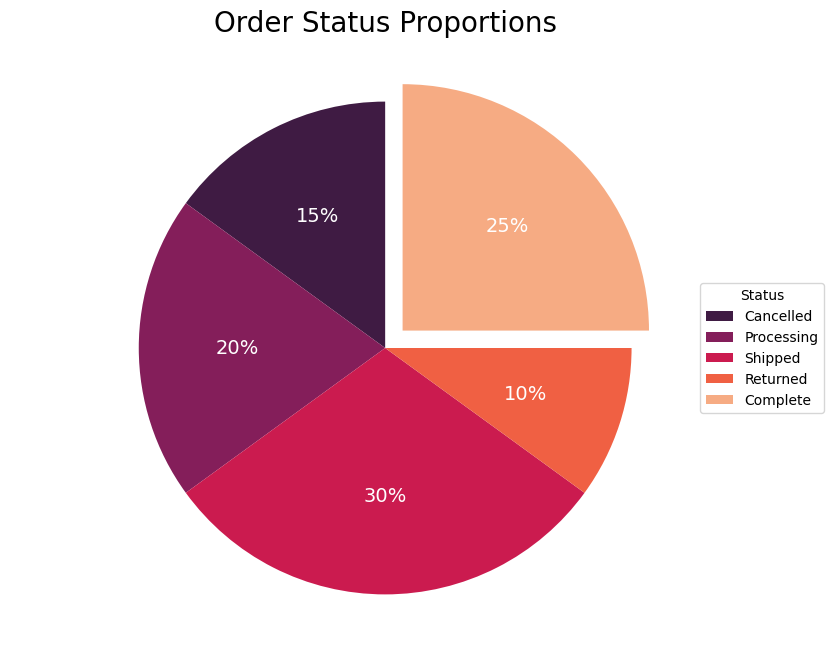

In [18]:
# creating a dataframe for pie chart
df_stacked = pd.DataFrame(df.groupby('status')['created_at'].count().reset_index()).rename(columns={'status':'status', 'created_at':'count'})

df_stacked['count_%'] = round(df_stacked['count']/df_stacked['count'].sum(),2)


# Prepare data for the pie chart
labels = df_stacked['status']
sizes = df_stacked['count_%']

# Define a color palette using seaborn
colors = sns.color_palette("rocket", len(labels))

# Define explode values to highlight the "Complete" section
explode = [0, 0, 0, 0, 0.1]  # Only "Complete" is exploded

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.0f}%', startangle=90, colors=colors,
       textprops={'color': 'white', 'fontsize': 14}, explode = explode)

# Set title
plt.title('Order Status Proportions', fontsize = 20)

# add legend
plt.legend(labels, title="Status", loc="center left", bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

Merujuk pada `pie chart` di atas, dapat dilihat bahwa terdapat $25\%$ dari keseluruhan order yang `status`-nya telah `Complete`. Analisa retensi *cohort* akan menggunakan order dengan status `Complete` karena status `Complete` merujuk pada proses order yang telah final (*profitable*).

Selanjutnya, akan dilakukan validasi data untuk menjamin validitas order yang dianalisa dengan menyaring order yang tanggal pengiriman *shipping* (`shipped_at`) lebih besar daripada pembuatan order (`created_at`).

Berikut visualisasi jumlah order yang tidak *valid* akibat tanggal pengiriman *shipping* (`shipped_at`) lebih kecil daripada pembuatan order (`created_at`).

In [20]:
# checking for anomalities in the shipped at date
df.loc[df['shipped_at'].dt.date < df['created_at'].dt.date, ['status', 'created_at', 'shipped_at', 'delivered_at']].head()

,status,created_at,shipped_at,delivered_at
5,Shipped,2023-09-19 09:13:08.000000,2023-09-16 09:24:00.000000,NaT
7,Complete,2022-04-01 13:25:52.000000,2022-03-31 05:13:00.000000,2022-04-02 22:18:00.000000
19,Shipped,2021-02-27 03:16:44.000000,2021-02-25 19:08:00.000000,NaT
28,Returned,2023-05-15 02:22:01.000000,2023-05-14 18:35:00.000000,2023-05-18 21:12:00.000000
32,Complete,2024-01-17 03:54:46.754527,2024-01-15 10:04:24.754527,2024-01-19 05:05:24.754527


status
Shipped       14014
Complete      11921
Returned       4714
Cancelled         0
Processing        0
Name: count, dtype: int64

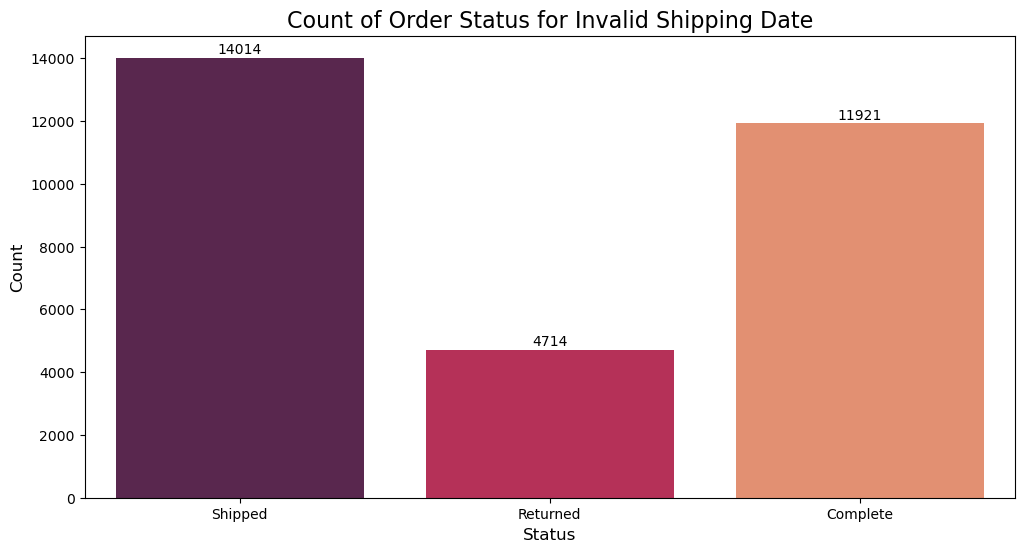

In [21]:
# check for the proportion of status in shipping dates smaller than creation dates
display(df[df['shipped_at'].dt.date < df['created_at'].dt.date]['status'].value_counts())

# Filter the dataframe to include only rows where 'shipped_at' < 'created_at'
filtered_df = df[df['shipped_at'].dt.date < df['created_at'].dt.date]
filtered_df['status'] = pd.Categorical(filtered_df['status'], ['Shipped', 'Returned', 'Complete'])

# # Set up the plot
plt.figure(figsize=(12, 6))

ax = sns.countplot(filtered_df, x='status', palette = 'rocket')

# Add text annotations to show the counts
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate non-zero bars
        ax.text(
            p.get_x() + p.get_width() / 2,  # x-coordinate
            p.get_height() + 250,  # y-coordinate (slightly above the bar)
            int(p.get_height()),  # Text value (cast as int to remove decimals)
            ha="center",  # Horizontal alignment
            va="center",  # Vertical alignment
            fontsize=10,  # Font size
            color="black",  # Text color
        )

plt.title('Count of Order Status for Invalid Shipping Date', fontsize = 16)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

In [22]:
# filter out rows with shipped at date lower than created at
df = df[df['shipped_at'].dt.date >= df['created_at'].dt.date]

In [23]:
# filter df based on order status complete
df = df[df['status'] == 'Complete']
df.shape

(33688, 11)

Mengingat periode analisa mulai dari tahun 2019 hingga 2024, maka akan dilakukan pendekatan periode semester untuk setiap *cohort*. Untuk menvalidasi bahwa pendekatan periode semester masih *valid*, maka dilakukan visualisasi `lineplot` untuk mengecek periode awal Januari 2019 dan setelah tahun 2024.

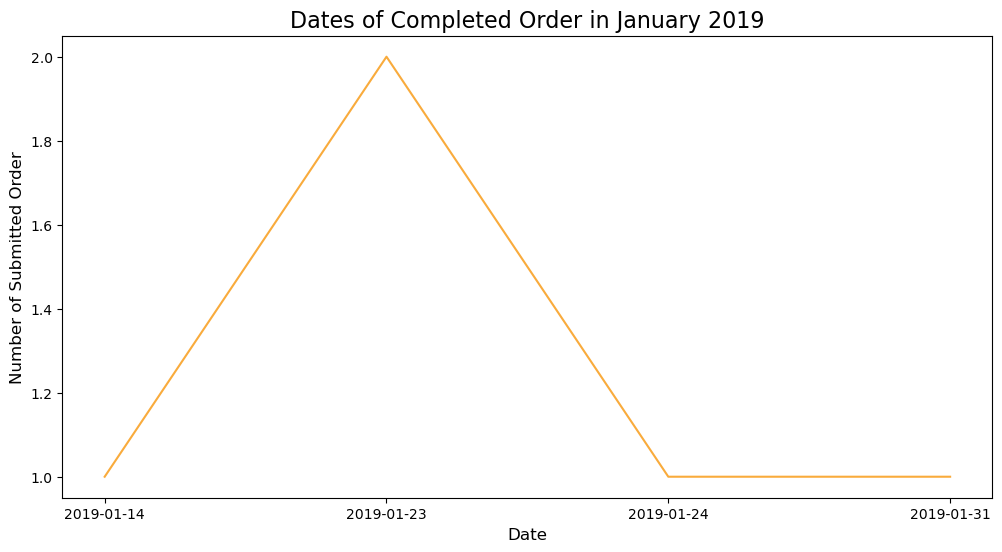

In [25]:
df_lineplot = df[['created_at', 'user_id']]
df_lineplot['created_at'] = df_lineplot['created_at'].dt.strftime('%Y-%m-%d')

df_lineplot=pd.DataFrame(df_lineplot.groupby('created_at')['user_id'].count().reset_index()).rename({'created_at':'date','user_id':'count_of_user_id'}, axis = 'columns')

# Set up the plot
plt.figure(figsize=(12, 6))

# drawing the lineplot with seaborn
sns.lineplot(df_lineplot, x=df_lineplot[df_lineplot["date"] <='2019-01-31']['date'], y=df_lineplot[df_lineplot["date"] <='2019-01-31']["count_of_user_id"], color='#f9ab3c')

# customizing the plot
plt.title('Dates of Completed Order in January 2019', fontsize = 16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Submitted Order", fontsize=12)

plt.show()

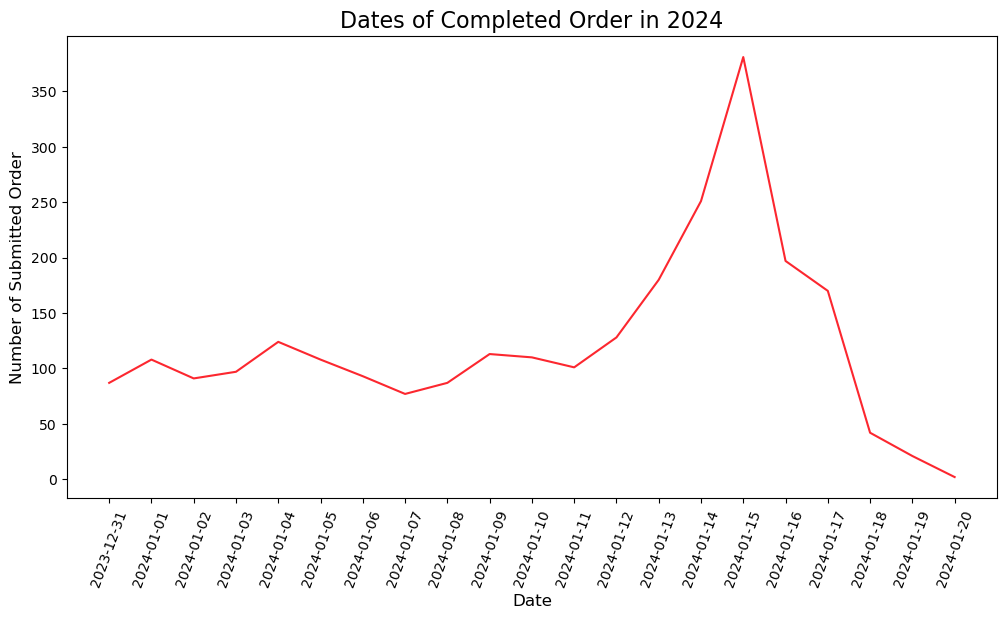

In [26]:
plt.figure(figsize = [12,6])

# drawing the lineplot with seaborn
sns.lineplot(df_lineplot, x=df_lineplot[df_lineplot["date"] >='2023-12-31']['date'], y=df_lineplot[df_lineplot["date"] >='2023-12-31']["count_of_user_id"], color = '#fc272f')

# customizing the plot
plt.title('Dates of Completed Order in 2024', fontsize = 16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Submitted Order", fontsize=12)
plt.xticks(rotation=70)

plt.show()

Berdasarkan kedua `lineplot` di atas, maka terdapat dua kesimpulan yang dapat kita ambil:

1. Order dengan status `Complete` dimulai dari tanggal 4 Januari 2019
2. Order dengan status `Complete` pada tahun 2024 hanya terdapat di bulan Januari saja

Maka dari itu, dapat disimpulkan bahwa periode Semester 1 tahun 2019 dan Semester 1 tahun 2024 dapat disisihkan dari analisa karena tidak mencakup periode 1 semester (6 bulan).

## Heatmap Cohort Retention

Di dalam seksi ini, akan dilakukan visualisasi `heatmap` untuk analisa retensi *cohort*.

Langkah pertama visualisasi diawali dengan pendefinisian periode *cohort* menggunakan modul `Pandas`

In [29]:
# step 1 - Define Cohort Period

# calculate cohort month
df["cohort_month"] = df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')

# Calculate cohort semester
df["cohort_semester"] = (df["cohort_month"].dt.year.astype(str) + "-S" + ((df["cohort_month"].dt.month - 1) // 6 + 1).astype(str))
df.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,cohort_month,cohort_semester
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21,2023-03-15 22:57:00,2023-03-18 01:08:00,NaT,0.02,2023-03,2023-S1
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30,2023-12-06 01:20:00,2023-12-10 10:04:00,NaT,0.02,2023-12,2023-S2
6,67253,46269,37023,14159,181497,Complete,2021-10-31 01:26:46,2021-11-01 17:47:00,2021-11-02 13:29:00,NaT,0.49,2021-10,2021-S2
12,54884,37750,30232,28700,148082,Complete,2023-02-27 02:31:30,2023-03-01 14:39:00,2023-03-03 16:51:00,NaT,1.50,2023-02,2023-S1
13,97403,67023,53552,14202,262807,Complete,2022-10-04 11:51:58,2022-10-04 17:02:00,2022-10-05 15:03:00,NaT,1.50,2022-10,2022-S2


Pada langkah selanjutnya, kita akan mendefinisikan periode transaksi setiap semester per *cohort*. Data duplikat akan dibuang agar setiap `user_id` memiliki periode *cohort* dan transaksi yang unik

In [31]:
#Step 2
#define current_transaction_period
df['current_transaction_month']=df['created_at'].dt.to_period('M')
df['current_transaction_semester'] = (df["current_transaction_month"].dt.year.astype(str) + "-S" + ((df["current_transaction_month"].dt.month - 1) // 6 + 1).astype(str))


retention = df[['user_id', 'cohort_semester', 'current_transaction_semester']]
retention.drop_duplicates(inplace=True)
retention

,user_id,cohort_semester,current_transaction_semester
1,22551,2023-S1,2023-S1
2,28215,2023-S2,2023-S2
6,37023,2021-S2,2021-S2
12,30232,2023-S1,2023-S1
13,53552,2022-S2,2022-S2
...,...,...,...
181632,84500,2021-S1,2021-S1
181634,92737,2022-S2,2022-S2
181635,92908,2023-S2,2023-S2
181636,98471,2022-S2,2022-S2


Dataset disaring untuk mengeluarkan periode Semester 1 2019 dan Semester 1 2024 sesuai dengan hasil dari EDA di atas.

In [33]:
# step 2a - filter out 2024-s1 and 2019-s1 from cohort_semester
retention.drop(retention[(retention['cohort_semester'] == '2019-S1') | (retention['cohort_semester']=='2024-S1')].index, inplace = True)
retention['cohort_semester'].value_counts()

cohort_semester
2023-S2    7335
2023-S1    4952
2022-S2    3851
2022-S1    2956
2021-S2    2297
2021-S1    1894
2020-S2    1352
2020-S1     961
2019-S2     532
Name: count, dtype: int64

In [34]:
# step 2b - filter out 2024-s1 and 2019-s1 current_transaction_semester
retention.drop(retention[(retention['current_transaction_semester'] == '2019-S1') | (retention['current_transaction_semester']=='2024-S1')].index, inplace = True)
retention['current_transaction_semester'].value_counts()

current_transaction_semester
2023-S2    8016
2023-S1    5067
2022-S2    3798
2022-S1    2807
2021-S2    2124
2021-S1    1704
2020-S2    1169
2020-S1     823
2019-S2     438
Name: count, dtype: int64

Dataset yang telah disaring kemudian akan dilakukan metode `groupby()` untuk mengelompokkan jumlah `user_id` berdasarkan periode `cohort` konsumen dan transaksi.  

In [36]:
# step 3 - counting number of user in each cohort
cohort_retention = retention.groupby(['cohort_semester','current_transaction_semester'])['user_id'].count().reset_index().rename(columns={'user_id':'count_user'})
cohort_retention.head()

,cohort_semester,current_transaction_semester,count_user
0,2019-S2,2019-S2,438
1,2019-S2,2020-S1,13
2,2019-S2,2020-S2,6
3,2019-S2,2021-S1,13
4,2019-S2,2021-S2,13


Untuk langkah 4 hingga langkah 6, dataset yang telah disaring akan ditransformasikan menjadi bentuk `pivot table` dengan nilai persentase dari setiap konsumen untuk setiap *cohort* konsumen, sebelum dilakukan visualisasi `heatmap` menggunakan `Seaborn` *package*.

In [38]:
### step 4
from operator import attrgetter

def semester_to_numeric(semester_0_series, semester_1_series):
    # Extract year and semester parts
    year_co = semester_0_series.str.split("-S").str[0].astype(int)
    semester_co = semester_0_series.str.split("-S").str[1].astype(int)

    year_cu = semester_1_series.str.split("-S").str[0].astype(int)
    semester_cu = semester_1_series.str.split("-S").str[1].astype(int)

    # Calculate the semester difference
    return (year_cu - year_co) * 2 + (semester_cu - semester_co)


# Calculate the semester distance
cohort_retention["semester_distance"] = semester_to_numeric(cohort_retention['cohort_semester'],cohort_retention['current_transaction_semester'])
cohort_retention.head()

,cohort_semester,current_transaction_semester,count_user,semester_distance
0,2019-S2,2019-S2,438,0
1,2019-S2,2020-S1,13,1
2,2019-S2,2020-S2,6,2
3,2019-S2,2021-S1,13,3
4,2019-S2,2021-S2,13,4


In [39]:
# step 5
# create pivot table with period_distance
cohort_retention_pivot = cohort_retention.pivot_table(index='cohort_semester', columns='semester_distance', values='count_user')
cohort_retention_pivot

semester_distance,0,1,2,3,4,5,6,7,8
cohort_semester,,,,,,,,,
2019-S2,438.0,13.0,6.0,13.0,13.0,13.0,10.0,12.0,14.0
2020-S1,810.0,18.0,31.0,18.0,18.0,23.0,25.0,17.0,NaN
2020-S2,1145.0,29.0,26.0,42.0,37.0,33.0,37.0,NaN,NaN
2021-S1,1631.0,54.0,44.0,56.0,48.0,55.0,NaN,NaN,NaN
2021-S2,2013.0,66.0,71.0,69.0,69.0,NaN,NaN,NaN,NaN
2022-S1,2624.0,114.0,106.0,96.0,NaN,NaN,NaN,NaN,NaN
2022-S2,3487.0,172.0,187.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-S1,4602.0,321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-S2,7220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# display the first column of cohort_retention_pivot
cohort_retention_pivot.iloc[:,0]

cohort_semester
2019-S2     438.0
2020-S1     810.0
2020-S2    1145.0
2021-S1    1631.0
2021-S2    2013.0
2022-S1    2624.0
2022-S2    3487.0
2023-S1    4602.0
2023-S2    7220.0
Name: 0, dtype: float64

In [41]:
# step 6
# percentage
cohort_retention_final = cohort_retention_pivot.divide(cohort_retention_pivot.iloc[:,0], axis=0)
cohort_retention_final

semester_distance,0,1,2,3,4,5,6,7,8
cohort_semester,,,,,,,,,
2019-S2,1.0,0.029680,0.013699,0.029680,0.029680,0.029680,0.022831,0.027397,0.031963
2020-S1,1.0,0.022222,0.038272,0.022222,0.022222,0.028395,0.030864,0.020988,NaN
2020-S2,1.0,0.025328,0.022707,0.036681,0.032314,0.028821,0.032314,NaN,NaN
2021-S1,1.0,0.033109,0.026977,0.034335,0.029430,0.033722,NaN,NaN,NaN
2021-S2,1.0,0.032787,0.035271,0.034277,0.034277,NaN,NaN,NaN,NaN
2022-S1,1.0,0.043445,0.040396,0.036585,NaN,NaN,NaN,NaN,NaN
2022-S2,1.0,0.049326,0.053628,NaN,NaN,NaN,NaN,NaN,NaN
2023-S1,1.0,0.069752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-S2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


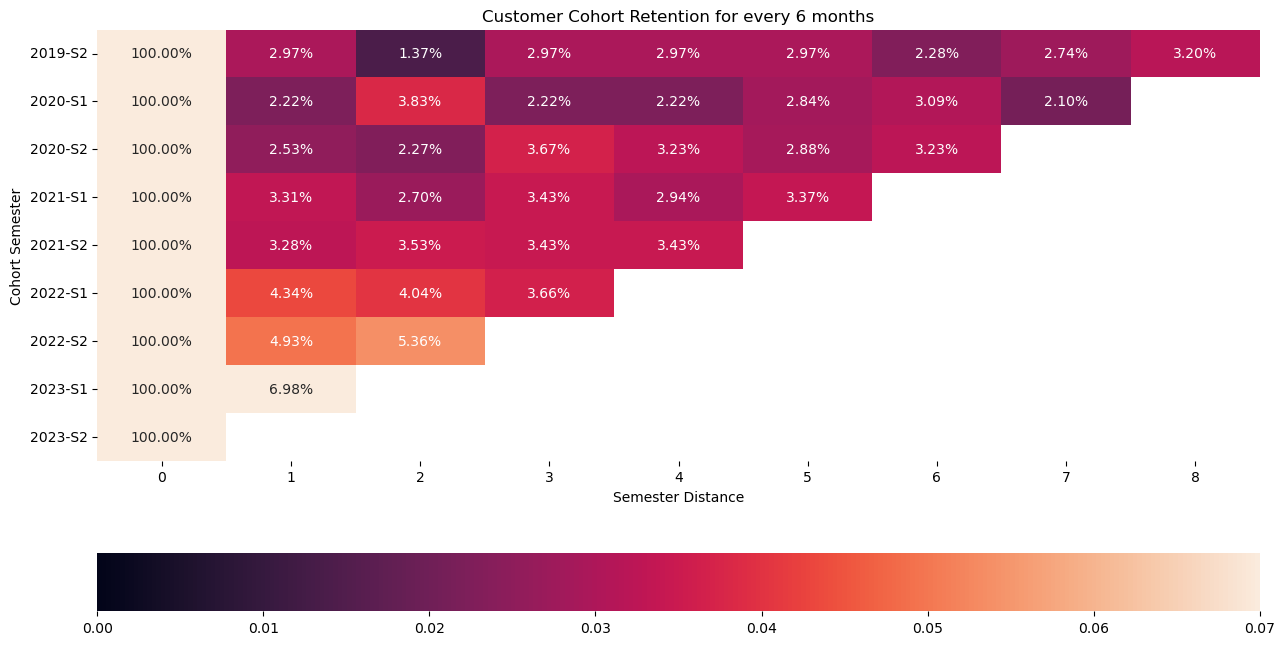

In [42]:
#create heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data=cohort_retention_final,annot=True,fmt='.2%',
           cbar_kws={'orientation':'horizontal'}, vmin=0.0, vmax=0.07,
           cmap='rocket')
plt.title('Customer Cohort Retention for every 6 months')
plt.xlabel('Semester Distance')
plt.ylabel('Cohort Semester')
plt.show()

## Lineplot Cohort Retention

Pada visualisasi `lineplot`, langkah awal yang dilakukan adalah melakukan metode `copy()` pada dataset `cohort_retention`. Selanjutnya, dataset tersebut akan dilakukan perubahan tipe data sebagai bentuk *data cleansing*, sebelum dihitung persentase untuk setiap *cohort* kustomer.

In [44]:
# copying cohort_retention dataframe for lineplot
lineplot = cohort_retention.copy()
lineplot.head()

,cohort_semester,current_transaction_semester,count_user,semester_distance
0,2019-S2,2019-S2,438,0
1,2019-S2,2020-S1,13,1
2,2019-S2,2020-S2,6,2
3,2019-S2,2021-S1,13,3
4,2019-S2,2021-S2,13,4


In [45]:
# step 1: preprocessing

# Casting date to string
lineplot['cohort_semester'] = lineplot['cohort_semester'].astype(str)
lineplot['current_transaction_semester'] = lineplot['current_transaction_semester'].astype(str)

lineplot.head()

,cohort_semester,current_transaction_semester,count_user,semester_distance
0,2019-S2,2019-S2,438,0
1,2019-S2,2020-S1,13,1
2,2019-S2,2020-S2,6,2
3,2019-S2,2021-S1,13,3
4,2019-S2,2021-S2,13,4


In [46]:
# step 2
# Filter first period
lineplot_0 = lineplot.groupby(['cohort_semester']).agg({'count_user': 'max'})
lineplot_0

,count_user
cohort_semester,
2019-S2,438
2020-S1,810
2020-S2,1145
2021-S1,1631
2021-S2,2013
2022-S1,2624
2022-S2,3487
2023-S1,4602
2023-S2,7220


In [47]:
# step 3
# create percent
lineplot_percent = lineplot.set_index(['cohort_semester']).div(lineplot_0, level='cohort_semester').rename(columns={'count_user':'percentage'}).reset_index()
lineplot_percent.head(10)

,cohort_semester,percentage,current_transaction_semester,semester_distance
0,2019-S2,1.000000,NaN,NaN
1,2019-S2,0.029680,NaN,NaN
2,2019-S2,0.013699,NaN,NaN
3,2019-S2,0.029680,NaN,NaN
4,2019-S2,0.029680,NaN,NaN
5,2019-S2,0.029680,NaN,NaN
6,2019-S2,0.022831,NaN,NaN
7,2019-S2,0.027397,NaN,NaN
8,2019-S2,0.031963,NaN,NaN
9,2020-S1,1.000000,NaN,NaN


Dataset kemudian ditambahkan periode transaksi dan jarak semester sebelum divisualisasikan menggunakan `Seaborn`.

In [49]:
# step 4
# Add current transaction month & period distance
lineplot_percent['current_transaction_semester'] = lineplot['current_transaction_semester']
lineplot_percent['semester_distance'] = lineplot['semester_distance']

# Display result
display(lineplot_percent.head(10))

,cohort_semester,percentage,current_transaction_semester,semester_distance
0,2019-S2,1.000000,2019-S2,0
1,2019-S2,0.029680,2020-S1,1
2,2019-S2,0.013699,2020-S2,2
3,2019-S2,0.029680,2021-S1,3
4,2019-S2,0.029680,2021-S2,4
5,2019-S2,0.029680,2022-S1,5
6,2019-S2,0.022831,2022-S2,6
7,2019-S2,0.027397,2023-S1,7
8,2019-S2,0.031963,2023-S2,8
9,2020-S1,1.000000,2020-S1,0


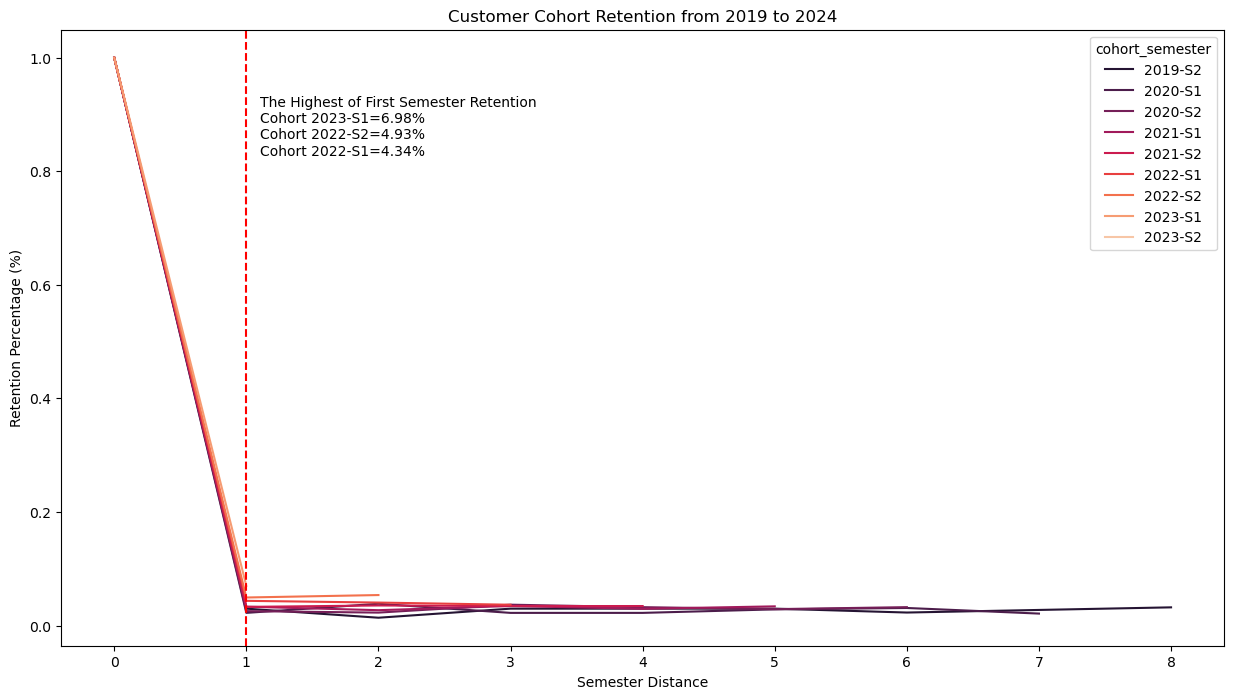

In [50]:
#create lineplot
plt.figure(figsize=(15,8))

#cohort lineplot
sns.lineplot(data=lineplot_percent,x='semester_distance',y='percentage',hue='cohort_semester', palette = 'rocket')

# #vertical line
plt.axvline(x=1,linestyle='--',color='red')

#anotasi
top_3=lineplot_percent[lineplot_percent['semester_distance']==1].sort_values(by='percentage',ascending=False).head()
top_3_name=top_3['cohort_semester'].to_list()
top_3_percentage=top_3['percentage'].to_list()

#string anotasi
text=f'''
The Highest of First Semester Retention
Cohort {top_3_name[0]}={top_3_percentage[0]:.2%}
Cohort {top_3_name[1]}={top_3_percentage[1]:.2%}
Cohort {top_3_name[2]}={top_3_percentage[2]:.2%}
'''

plt.text(1.1,0.8,text)

plt.xlabel('Semester Distance')
plt.ylabel('Retention Percentage (%)')
plt.title('Customer Cohort Retention from 2019 to 2024')
plt.show()

## Wawasan dari Visualisasi Cohort

### 1. Analisis Retensi Tiap Cohort

**Cohort 2019-S2**

- Retensi semester 1: 2.84%.
- Penurunan signifikan hingga semester 8 menjadi 3.31%.
- Penurunan ini kemungkinan terkait dengan awal pandemi COVID-19, yang memengaruhi perilaku belanja pelanggan secara drastis.

**Cohort 2020-S1 dan 2020-S2**

- Retensi di semester awal hanya 2.27%-2.32%, lebih rendah dibanding cohort sebelumnya.
- Pandemi yang mencapai puncak pada 2020 menyebabkan prioritas pelanggan bergeser ke kebutuhan esensial, sehingga minat pada fashion menurun.

**Cohort 2021-S1 dan 2021-S2**

- Mulai menunjukkan sedikit peningkatan retensi di semester awal (3.07%-3.32%) dibanding cohort 2020.
- Kemungkinan ini dipengaruhi oleh adopsi strategi digital seperti e-commerce, meskipun aktivitas belanja tetap terbatas karena pandemi masih berlangsung.

**Cohort 2022-S1 hingga 2023-S2**
- Retensi menunjukkan tren positif. Cohort 2023-S1 memiliki retensi semester awal tertinggi di 6.73%.
- Hal ini dapat mencerminkan rebound pasca-pandemi, di mana pelanggan kembali aktif berbelanja untuk memenuhi kebutuhan gaya hidup dan sosial mereka.

### 2. Tren Retensi Secara Keseluruhan

**Retensi rendah secara konsisten**

Di semua cohort, retensi rata-rata berada di bawah 7%. Hal ini menunjukkan tantangan besar dalam mempertahankan pelanggan di industri fashion, yang sangat bergantung pada tren.

**Bounce back setelah pandemi**

Cohort terbaru (2022-2023) menunjukkan retensi yang lebih baik di semester awal. Ini mencerminkan keberhasilan pemulihan perusahaan, baik melalui strategi pemasaran maupun pengalaman belanja pelanggan.

### 3. Pengaruh Faktor Eksternal

**Pandemi COVID-19 (2019-2021)**

Cohort pada masa pandemi mengalami retensi yang sangat rendah, dipengaruhi oleh:
- Penurunan daya beli konsumen.
- Pembatasan sosial yang mengurangi kebutuhan akan pakaian fashion.
- Pergeseran ke pembelian barang esensial.

**Pemulihan Pasca-Pandemi (2022-2023):**

Retensi meningkat karena:
- Aktivitas sosial kembali normal.
- Pelanggan melakukan revenge spending setelah pandemi.
- Perusahaan mungkin telah beradaptasi dengan digitalisasi melalui e-commerce dan promosi daring.

## Kesimpulan & Rekomendasi

1. **Optimalkan retensi pelanggan baru:**

- Cohort terbaru menunjukkan potensi besar. Strategi seperti program loyalty dan personalisasi produk bisa membantu meningkatkan retensi.

2. **Fokuskan retensi periode awal**:
- Tingkat customer churn pada semester awal sangat tinggi, sehingga intervensi seperti diskon untuk pembelian kedua atau pengingat belanja patut dipertimbangkan.

3. **Intensifikasikan strategi pasca-pandemi**
- Retensi cohort periode paska pandemi menunjukkan penambahan signifikan, sehingga dapat dibuktikan bahwa strategi baru manajemen yang diterapkan memiliki efek positif dan dapat ditingkatkan intensitasnnya

## Export Dataframes for Google Looker Dashboard

In [ ]:
# to csv for google looker
cohort_retention_final.to_csv('cohort_semester_retention.csv')
lineplot_percent.to_csv('lineplot_semester_percent.csv',  index = False)